# Seattle Library Checkout Data Analysis

# 1. Introduction

The dataset informing this analysis includes anonymized checkout information from the Seattle Public Library for the years 2005, 2010, and 2015, a data dictionary, and an inventory which includes title and author information. Analysis of this data focuses on trends in borrowing by item type. 

Lending data from the Seattle Public Library can be found [here](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf).

# 2. Analysis Goals

#### Navigation

- [2.1 Trends by Item Type](#2.1-Trends-by-Item-Type)
    - [2.1.1 What Item Formats are the Most Popular?](#2.1.1-What-Item-Formats-are-the-Most-Popular?)
    - [2.1.2 Identifying the Top 5 Item Formats ](#2.1.2-Identifying-the-Top-5-Item-Formats )
    - [2.1.3 Visualizing Differences in Item Format by Year](#2.1.3-Visualizing-Differences-in-Item-Format-by-Year)
    - [2.1.4 Analysis](#2.1.4-Analysis)

## 2.1 Trends by Item Type

In [1]:
# import libraries

import pandas as pd
import numpy as np
import pyodbc
import sqlalchemy 
from sqlalchemy import create_engine

In [2]:
# connect Notebook to file containing credentials for connecting to SQLAlchemy

from credentials import SERVER
from credentials import USERNAME
from credentials import PASSWORD

In [3]:
# connect Notebook to Microsoft SQL Server Database

SERVER = SERVER
DATABASE = 'Seattle_Library_Checkout_Records'
DRIVER = 'ODBC Driver 17 for SQL Server'
USERNAME = USERNAME
PASSWORD = PASSWORD
TRUSTED_CONNECTION = 'yes'
DATABASE_CONNECTION = f'mssql+pyodbc://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?trusted_connection={TRUSTED_CONNECTION}&driver={DRIVER}'

In [4]:
# connect Notebook to Microsoft SQL Server Database using SQLAlchemy

engine = sqlalchemy.create_engine(DATABASE_CONNECTION)
connection = engine.connect()

In [5]:
%load_ext sql

### 2.1.1 What Item Formats are the Most Popular?
[Back to Navigation](#Navigation)

The Seattle Public Library dataset provides information on the format of lent items, which are sorted into a broad main group and more specific subgroup. For example, a CD of an audiobook would fall into the *media* format group and *Audiobook Disc* format subgroup. The focus of this analysis will be on determining which formats were the most commonly borrowed for the years 2005, 2010, and 2015. 

In [6]:
# identify format subgroups and format groups

format_subgroups = pd.read_sql("SELECT DISTINCT dd.Format_Subgroup, dd.Format_Group\
                                FROM dbo.Checkouts_By_Title_Data_Lens_2005 AS loans_2005\
                                LEFT JOIN dbo.Integrated_Library_System__ILS__Data_Dictionary AS dd\
                                ON loans_2005.ItemType = dd.Code\
                                WHERE dd.Format_Subgroup IS NOT NULL\
                                ORDER BY dd.Format_Group;", 
                                con=engine)
format_subgroups

,Format_Subgroup,Format_Group
0,Art,Media
1,Audio Disc,Media
2,Audio Tape,Media
3,Audiobook Disc,Media
4,Data Disc,Media
5,Film,Media
6,Kit,Media
7,Video Disc,Media
8,Video Tape,Media
9,Book,Print


- We can see that we have 2 unique, non-NULL format groups and 13 unique, non-NULL format subgroups.

In [7]:
# find the format subgroup that was borrowed the most in 2005

pop_format_2005 = pd.read_sql("SELECT dd.Format_Subgroup, COUNT(dd.Format_Subgroup) AS Subgroup_Item_Count\
                                FROM dbo.Checkouts_By_Title_Data_Lens_2005 AS loans_2005\
                                JOIN dbo.Integrated_Library_System__ILS__Data_Dictionary AS dd\
                                ON loans_2005.ItemType = dd.Code\
                                WHERE dd.Format_Subgroup IS NOT NULL\
                                GROUP BY dd.Format_Subgroup\
                                ORDER BY Subgroup_Item_Count DESC",
                                con=engine)

# add a title and thousands separator for readability

pop_format_2005.style.set_caption("2005: Borrowed Items by Item Type").format(thousands=",") 

,Format_Subgroup,Subgroup_Item_Count
0,Book,"1,227,871"
1,Audio Disc,"329,371"
2,Video Disc,"317,595"
3,Video Tape,"237,664"
4,Audio Tape,"48,884"
5,Kit,"12,301"
6,Music Score,"4,977"
7,Data Disc,"1,699"
8,Audiobook Disc,131
9,Periodical,39


In [8]:
# find the format subgroup that was borrowed the most in 2010

pop_format_2010 = pd.read_sql("SELECT dd.Format_Subgroup, COUNT(dd.Format_Subgroup) AS Subgroup_Item_Count\
                                FROM dbo.Checkouts_By_Title_Data_Lens_2010 AS loans_2010\
                                JOIN dbo.Integrated_Library_System__ILS__Data_Dictionary AS dd\
                                ON loans_2010.ItemType = dd.Code\
                                WHERE dd.Format_Subgroup IS NOT NULL\
                                GROUP BY dd.Format_Subgroup\
                                ORDER BY Subgroup_Item_Count DESC",
                                con=engine)

# add a title and thousands separator for readability

pop_format_2010.style.set_caption("2010: Borrowed Items by Item Type").format(thousands=",")

,Format_Subgroup,Subgroup_Item_Count
0,Book,"4,213,105"
1,Video Disc,"2,851,137"
2,Audio Disc,"1,294,295"
3,Kit,"24,287"
4,Video Tape,"14,816"
5,Music Score,"11,573"
6,Audio Tape,"5,777"
7,Audiobook Disc,"2,472"
8,Data Disc,330
9,Periodical,84


In [9]:
# find the format subgroup that was borrowed the most in 2015

pop_format_2015 = pd.read_sql("SELECT dd.Format_Subgroup, COUNT(dd.Format_Subgroup) AS Subgroup_Item_Count\
                                FROM dbo.Checkouts_By_Title_Data_Lens_2015 AS loans_2015\
                                JOIN dbo.Integrated_Library_System__ILS__Data_Dictionary AS dd\
                                ON loans_2015.ItemType = dd.Code\
                                WHERE dd.Format_Subgroup IS NOT NULL\
                                GROUP BY dd.Format_Subgroup\
                                ORDER BY Subgroup_Item_Count DESC",
                                con=engine)

# add a title and thousands separator for readability

pop_format_2015.style.set_caption("2015: Borrowed Items by Item Type").format(thousands=",")

,Format_Subgroup,Subgroup_Item_Count
0,Book,"3,984,357"
1,Video Disc,"2,051,905"
2,Audio Disc,"798,312"
3,Kit,"20,114"
4,Music Score,"8,613"
5,Audiobook Disc,888
6,Data Disc,26
7,Audio Tape,14
8,Periodical,12
9,Film,3


### 2.1.2 Identifying the Top 5 Item Formats 
[Back to Navigation](#Navigation)

*What item formats were the most popular for the years 2005, 2010, and 2010?*

In [10]:
items_2005 = pop_format_2005[:5]
items_2010 = pop_format_2010[:5]
items_2015 = pop_format_2015[:5]

Consider the top 5 items from 2005:

In [11]:
items_2005.style.set_caption("2005: Borrowed Items by Item Type").format(thousands=",")

,Format_Subgroup,Subgroup_Item_Count
0,Book,"1,227,871"
1,Audio Disc,"329,371"
2,Video Disc,"317,595"
3,Video Tape,"237,664"
4,Audio Tape,"48,884"


In [12]:
count_2005 = items_2005.sum(axis=0, numeric_only=True)
count_2005

Subgroup_Item_Count    2161385
dtype: int64

Then the top 5 items from 2010:

In [13]:
items_2010.style.set_caption("2010: Borrowed Items by Item Type").format(thousands=",")

,Format_Subgroup,Subgroup_Item_Count
0,Book,"4,213,105"
1,Video Disc,"2,851,137"
2,Audio Disc,"1,294,295"
3,Kit,"24,287"
4,Video Tape,"14,816"


In [14]:
count_2010 = items_2010.sum(axis=0, numeric_only=True)
count_2010

Subgroup_Item_Count    8397640
dtype: int64

And the top 5 items from 2015:

In [15]:
items_2015.style.set_caption("2015: Borrowed Items by Item Type").format(thousands=",")

,Format_Subgroup,Subgroup_Item_Count
0,Book,"3,984,357"
1,Video Disc,"2,051,905"
2,Audio Disc,"798,312"
3,Kit,"20,114"
4,Music Score,"8,613"


In [16]:
count_2015 = items_2015.sum(axis=0, numeric_only=True)
count_2015

Subgroup_Item_Count    6863301
dtype: int64

In [17]:
# determine the % increase in items in circulation among the top 5 categories between 2005 and 2010 using (f-i)/i

((count_2010-count_2005)/count_2005)*100

Subgroup_Item_Count    288.530502
dtype: float64


Unsurprisingly, books were the most commonly lent item type for all three years surveyed; however, when looking at the lending count for the top 5 item types, changes in the way Americans consume audio and video media over time is clearly reflected in both the relative ranking of items and the total frequency with which they are checked out, even when considering the increase in the number of items in circulation between 2005 and 2010. This will be explored visually in the next section.

### 2.1.3 Visualizing Differences in Item Format by Year
[Back to Navigation](#Navigation)

Finding the percent breakdown for each of the top 5 items in the years 2005, 2010, and 2015 can help us better conceptualize and understand how these categories changed over time, even with the increase of 289% in items in circulation between the years 2005 and 2010.

#### The breakdown of percentages for the top 5 items of 2005:

In [18]:
tot_items_2005 = pop_format_2005["Subgroup_Item_Count"].sum()
tot_items_2005

2180566

In [19]:
def pct_share_2005(top_x):
    return pd.DataFrame(np.array((pop_format_2005.loc[:(top_x-1), "Subgroup_Item_Count"] / tot_items_2005) * 100)
                            , index=pop_format_2005.loc[:(top_x-1), "Format_Subgroup"]
                            , columns=["Percent Share in 2005"])

In [20]:
share_2005 = pct_share_2005(5).round(1)
share_2005

,Percent Share in 2005
Format_Subgroup,
Book,56.3
Audio Disc,15.1
Video Disc,14.6
Video Tape,10.9
Audio Tape,2.2


#### Compare this to the top 5 items of 2010:

In [21]:
tot_items_2010 = pop_format_2010["Subgroup_Item_Count"].sum()

In [22]:
def pct_share_2010(top_x):
    return pd.DataFrame(np.array((pop_format_2010.loc[:(top_x-1), "Subgroup_Item_Count"] / tot_items_2010) * 100)
                            , index=pop_format_2010.loc[:(top_x-1), "Format_Subgroup"]
                            , columns=["Percent Share in 2010"])

In [23]:
share_2010 = pct_share_2010(5).round(1)
share_2010

,Percent Share in 2010
Format_Subgroup,
Book,50.0
Video Disc,33.9
Audio Disc,15.4
Kit,0.3
Video Tape,0.2


In [24]:
type(share_2010)

pandas.core.frame.DataFrame

#### And the top 5 items of 2015:

In [25]:
tot_items_2015 = pop_format_2015["Subgroup_Item_Count"].sum()

In [26]:
def pct_share_2015(top_x):
    return pd.DataFrame(np.array((pop_format_2015.loc[:(top_x-1), "Subgroup_Item_Count"] / tot_items_2015) * 100)
                            , index=pop_format_2015.loc[:(top_x-1), "Format_Subgroup"]
                            , columns=["Percent Share in 2015"])

In [27]:
share_2015 = pct_share_2015(5).round(1)
share_2015

,Percent Share in 2015
Format_Subgroup,
Book,58.0
Video Disc,29.9
Audio Disc,11.6
Kit,0.3
Music Score,0.1


#### Plot Percentages by Category for 2005, 2010, and 2015

In [28]:
# perform an outer join to get all years into one DF

import matplotlib.pyplot as plt
import numpy as np

all_years = share_2005.join(share_2010, how="outer").join(share_2015, how="outer")

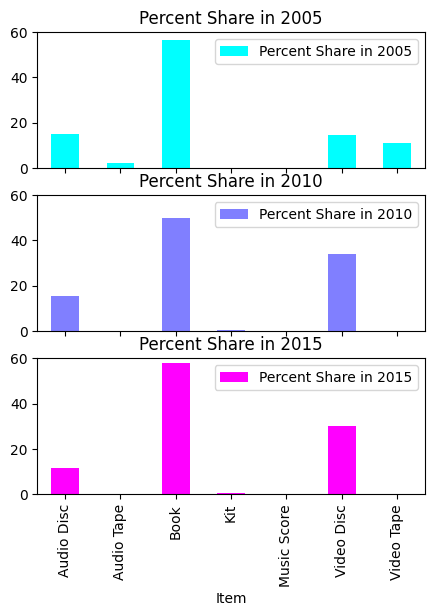

In [29]:
all_years.plot(kind="bar", subplots=True, colormap="cool", ylim=(0, 60), figsize=(5, 6))

plt.xlabel("Item")
plt.show()

The frequency of book checkouts eclipses that of any other item type, making it difficult to see the changes across other item types in the above plots. Removing the book values can give us a better view of the changes among the other media types.

In [30]:
# exclude "Book" from DF, replace NaN values with 0

all_years2 = all_years.loc[["Audio Disc", "Audio Tape", "Kit", "Music Score", "Video Disc", "Video Tape"], :]
all_years2.fillna(0)

,Percent Share in 2005,Percent Share in 2010,Percent Share in 2015
Format_Subgroup,,,
Audio Disc,15.1,15.4,11.6
Audio Tape,2.2,0.0,0.0
Kit,0.0,0.3,0.3
Music Score,0.0,0.0,0.1
Video Disc,14.6,33.9,29.9
Video Tape,10.9,0.2,0.0


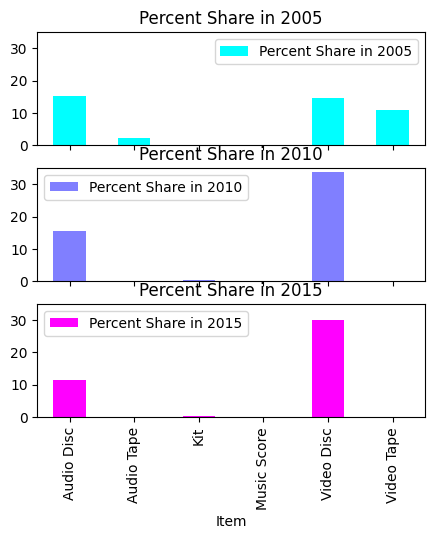

In [31]:
# plot top 2 through 5 categories 

all_years2.plot(kind="bar", subplots=True, colormap="cool", ylim = (0, 35), figsize=(5, 5))


plt.xlabel("Item")
plt.show()

### 2.1.4 Analysis
[Back to Navigation](#Navigation)

#### 2.1.4.1 Audio Discs

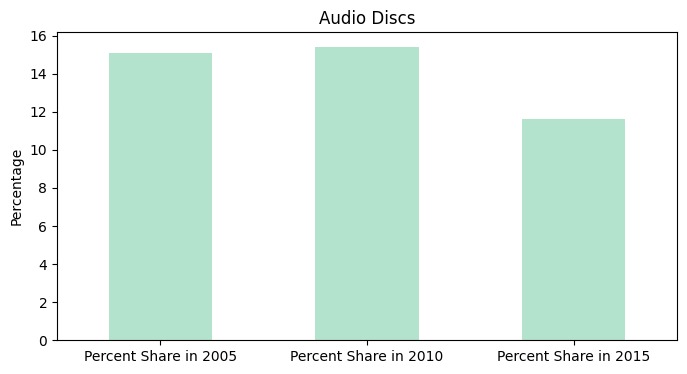

In [32]:
all_years2.loc["Audio Disc", :].plot(kind="bar", colormap="Pastel2", figsize=(8, 4), rot=0)

plt.title("Audio Discs")
plt.ylabel("Percentage")
plt.show()

Between 2005 and 2010, the checkout frequency of audio discs remained steady at 15% before dropping slightly to 12% in 2015. Compared to audio tapes, video tapes, and video discs, the popularity of audio discs remained relatively stable. This may be because between 2005 and 2015, CD players were standard hardware in vehicles, and the steady popularity of audio discs may have been bouyed by the continued availability of disc players, even as CD sales were mostly eclipsed by digital downloads and streaming (see chart *U.S. Recorded Music Sales Volumes by Format, 2000 to 2018, CD, CD Single, Dowload Album, Download Single*).

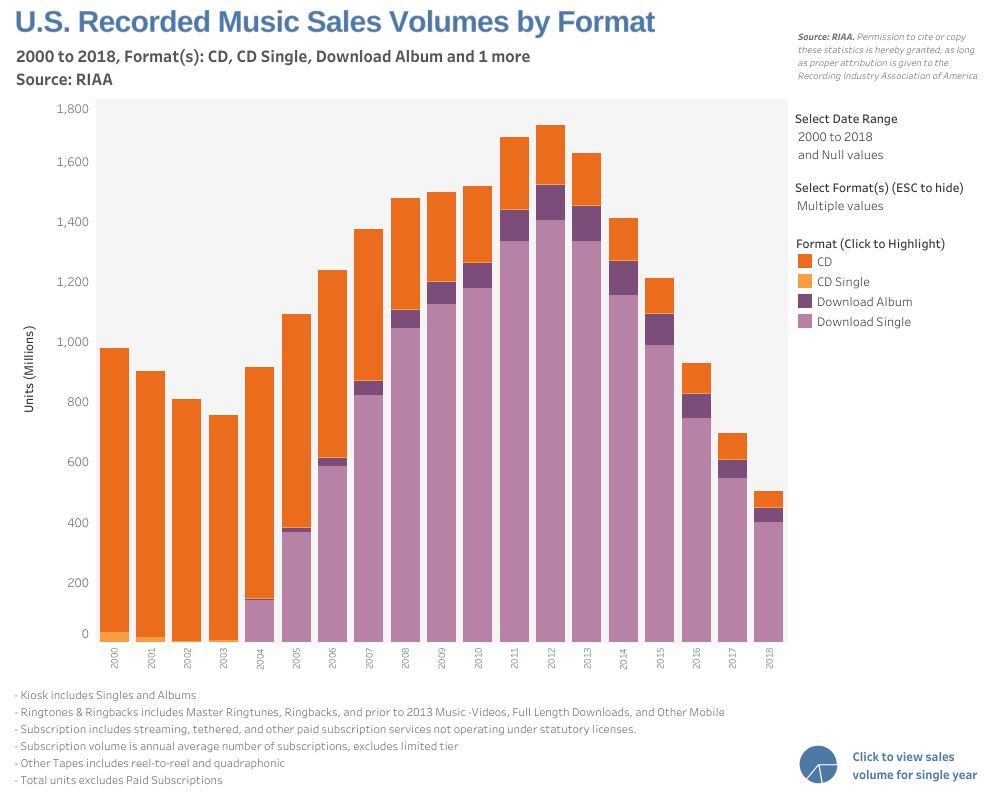

[Source: Recording Industry Association of America (RIAA)](https://www.riaa.com/u-s-sales-database/)

#### 2.1.4.2 Audio Tapes

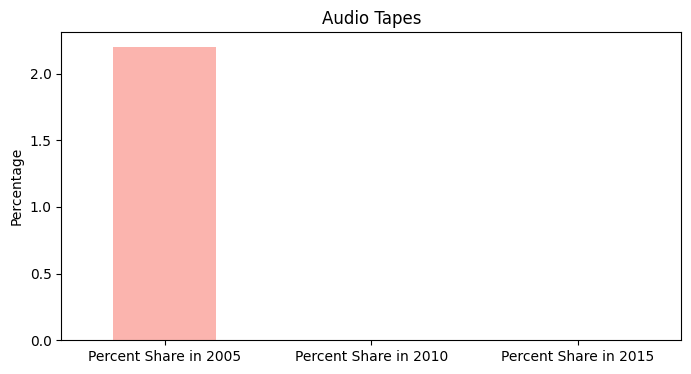

In [33]:
all_years2.loc["Audio Tape", :].plot(kind="bar", colormap="Pastel1", figsize=(8, 4), rot=0)

plt.title("Audio Tapes")
plt.ylabel("Percentage")
plt.show()

After 2005, checkouts of audio tapes became virtually nonexistent. According to the Recording Industry Association of America (RIAA), cassette sales peaked in 1990--by the late 1990s, CD sales had far outrun cassette sales and CD players had usurped cassette players as the audio player of choice in vehicles. In 2005, the average age of cars on the road was [~10 years (manufactured c. 1995), and had not risen much by 2010 at ~11 years (manufactured c. 1999)](https://www.wsj.com/articles/average-u-s-vehicle-age-hits-record-12-years-11623680640); the precipitous drop in cassette checkouts may be explained by the phasing out of cassette-compatible radios in cars between 2005 and 2010.

see chart *U.S. Recorded Music Sales Volumes by Format, 1990 to 2010, Cassette, Cassette Single, CD, CD Single*


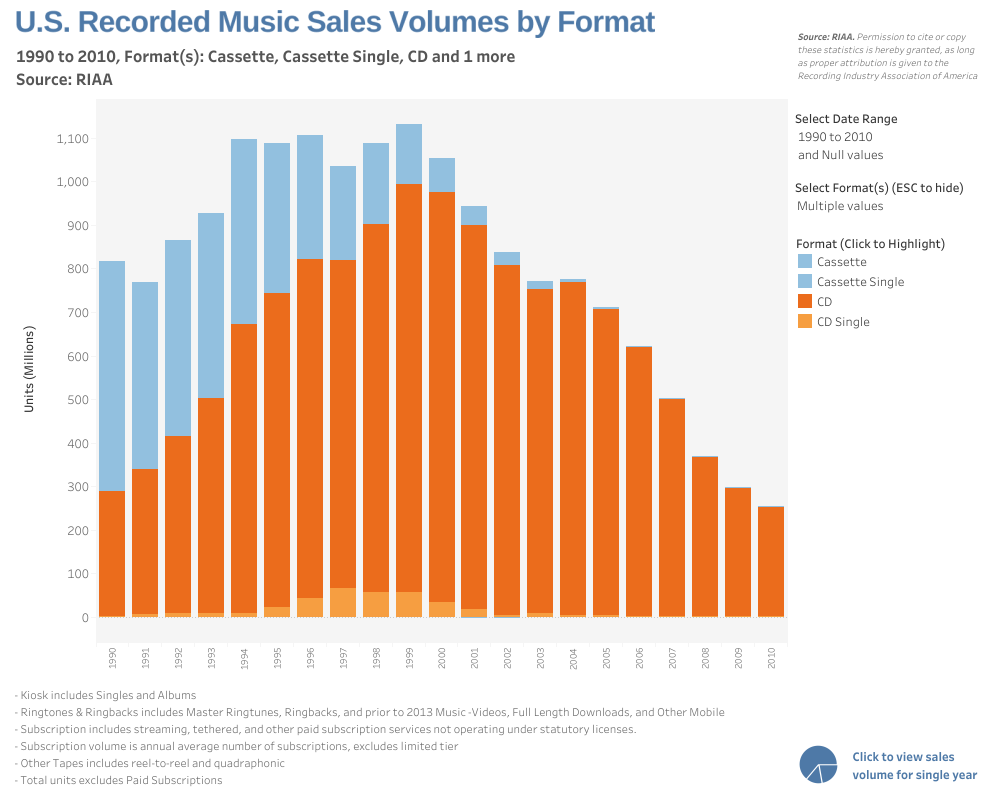

#### 2.1.4.3 Video Discs

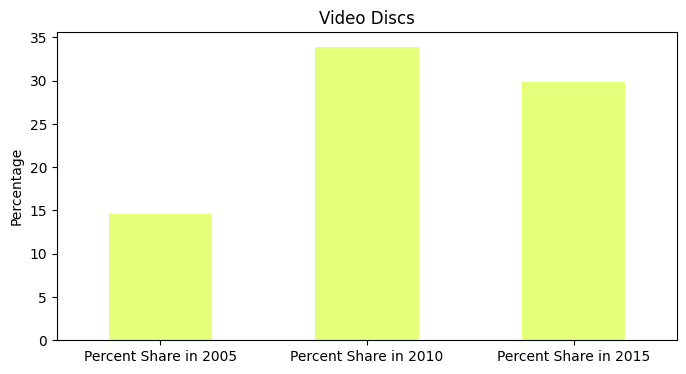

In [34]:
all_years2.loc["Video Disc", :].plot(kind="bar", colormap="Wistia", figsize=(8, 4), rot=0)

plt.title("Video Discs")
plt.ylabel("Percentage")
plt.show()

As with CDs, the increased popularity of video discs in 2010 and 2015 was most likely driven by a change in technology. This is further supported by the corresponding plunge in the borrowing of video tapes from 2005 to 2010 (see *2.1.4.4 Video Tapes*). According to the [DVD Entertainment Group](https://www.bizjournals.com/sanjose/stories/2002/01/07/daily34.html), DVD sales topped VHS sales for the first time in 2002, with sales of DVD players and DVDs growing at breakneck speed at the expense of the VHS. These trends seem to be reflected in lending data.

#### 2.1.4.4 Video Tapes

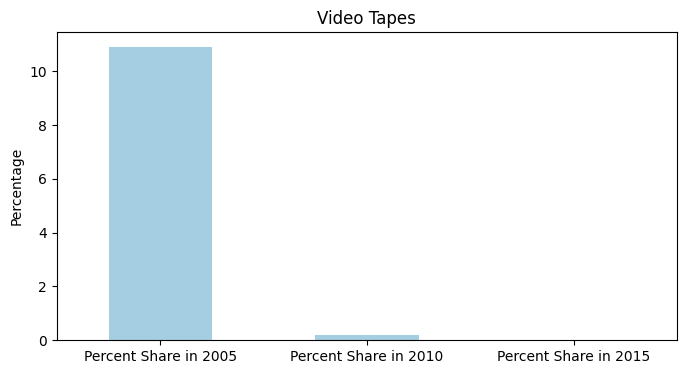

In [35]:
all_years2.loc["Video Tape", :].plot(kind="bar", colormap="Paired", figsize=(8, 4), rot=0)

plt.title("Video Tapes")
plt.ylabel("Percentage")
plt.show()

Similar to what was observed with the decline of the audio tape, video tape lending plummeted between 2005 and 2010, likely driven by the shift in popular technology from the VHS player to the DVD player. 